In [4]:
# Maak zelf een Python script (geen Jupyter Notebook) aan waarin je de functie accuracy, precision, recall, ... implementeert
# Zie ook Vraag 1 (tweede deel)
from oefeningen.oplossingen.evaluatiemetrieken import *

Opdrachten
==========

Vraag 1 - Accuarcy, Precision, Recall, F-measure
-------------------------------------------------

In de tabel hieronder vind je de confusion matrix van een binaire classifier.

|     &nbsp;    | Actual NO |  Actual YES|           |
|---------------|:---------:|:----------:|:---------:|
|Predicted NO   |50         | 5          |  **55**   |
|Predicted YES  |10         | 100        |  **110**  |
|     &nbsp;    |**60**     | **105**    |  ***165***|


Beantwoord nu de volgende vragen:

a) Wat zijn de waarden voor TP, TN, FP, FN?

In [5]:
# TP = 100, TN = 50, FP = 10, FN = 5

b) Bereken nu handmatig de accuracy, precision en recall.

In [6]:
# accuracy = 150/165
# precision = 100/110
# recall = 100/105

c) Bereken de $F_1$ en $F_{1.5}$-measures. Schrijf het resultaat op met 2 significantiecijfers.

In [7]:
# F1 = 0.93
# F1.5 = 0.94

d) Wat is de TPR en FPR? Vergelijk met je recall. Wat stel je vast?

In [8]:
# TPR = 100/110 en FPR = 10/60
# TPR == recall

Schrijf functies in Python die bovenstaande metrieken kunnen berekenen uit een confusion matrix. Maak hiervoor een apart Python bestand aan dat je import in deze Jupyter Notebook.

Let op: dit lukt niet met bestaande functies uit <code>sklearn.metrics</code>, want die werken op de ruwe gegevens en niet op een al bestaande confusion matrix.


a) Maak van bovenstaande tabel een (confusion) matrix in Python.

In [9]:
confusion_matrix = pd.DataFrame({'NO': [50,10], 'YES': [5,100]}, index=['NO','YES'])
confusion_matrix

,NO,YES
NO,50,5
YES,10,100


b) Schrijf een aparte functie voor elk metriek en controleer je oplossing.
    Zoek eerst de werking op van volgende functies in Python:
```python
pd.crosstab
np.diag
np.sum(axis=0 of 1)
map
```

In [10]:
def accuracy(confusion_matrix: pd.DataFrame):
    return pd.DataFrame([np.sum(np.diag(confusion_matrix)) / confusion_matrix.to_numpy().sum()], index=['Total'],
                        columns=['Accuracy'])


def precision(confusion_matrix: pd.DataFrame, weighted=True):
    precisions = pd.DataFrame(np.diag(confusion_matrix) / confusion_matrix.sum(axis=1), columns=['Precision'])
    if weighted:
        weights = confusion_matrix.sum(axis=1)
        return pd.DataFrame([np.average(precisions, weights=weights, axis=0)],
                            columns=precisions.columns, index=['Average'])
    return pd.DataFrame(precisions)

# recall en f-measure zelf uitwerken

Accuracy
0.9090909090909091

     Precision
NO    0.909091
YES   0.909091

       Recall
NO   0.833333
YES  0.952381

              F1
Average  0.91001

            F1.5
Average  0.91084


In [ ]:
print('Accuracy')
print(accuracy(confusion_matrix))
print()

print(precision(confusion_matrix, weighted=False))
print()

print(recall(confusion_matrix, weighted=False))
print()

print(fmeasure(confusion_matrix))
print()
print(fmeasure(confusion_matrix, beta=1.5))

Vraag 2 - Accuarcy, Precision, Recall, F-measure
-------------------------------------------------

In de tabel hieronder vind je de confusion matrix van een binaire classifier.

|&nbsp;       |   Actual A |   Actual B |           |
|:------------|:----------:|:----------:|:---------:|
| Predicted A |        100 |         50 |**150**    |
| Predicted B |          0 |          5 |**5**      |
| &nbsp;      |    **100** |     **55** |**150**  |

a) Wat zijn de waarden voor TP, TN, FP, FN?

In [11]:
# TP = 100,
# TN = 5,
# FP = 50,
# FN = 0

b) Bereken met je Python-functies de accuracy, precision en recall, en $F_1$.

In [12]:
confusion_matrix = pd.DataFrame({'A': [100,0], 'B': [50,5]}, index=['A','B'])
print(precision(confusion_matrix, weighted=False))
print(recall(confusion_matrix, weighted=False))
print(fmeasure(confusion_matrix, weighted=False))

# precision(A) = 0.67, recall(A) = 1,
# precision(B) = 1, recall(B) = 0.091,
# F1(A) = 0.8, F1(B) = 0.17

   Precision
A   0.666667
B   1.000000
     Recall
A  1.000000
B  0.090909
         F1
A  0.800000
B  0.166667


c) Is dit een goede classifier?

In [13]:
# Nee, lage precision voor A, lage recall en F1 voor B

Vraag 3 - Accuarcy, Precision, Recall, F-measure
-------------------------------------------------

In de tabel hieronder vind je de confusion matrix van een multiclass classifier.

|              &nbsp;   | &nbsp; | &nbsp; | **Werkelijke klasse** | &nbsp; |&nbsp;|&nbsp;|&nbsp;|
| --------------------- |:------:| :----: | :-------------------: | :--: | :--: | :----: | ---- |
|     &nbsp;            | &nbsp; | Asfalt |         Beton         | Gras | Boom | Gebouw |      |
| **Voorspelde klasse** | Asfalt |  2385  |           4           |  0   |  1   |   4    | 2394 |
|     &nbsp;            | Beton  |   0    |          332          |  0   |  0   |   1    | 333  |
|     &nbsp;            | Gras   |   0    |           1           | 908  |  8   |   0    | 917  |
|     &nbsp;            | Boom   |   0    |           0           |  0   | 1084 |   9    | 1093 |
|     &nbsp;            | Gebouw |   12   |           0           |  0   |  6   |  2053  | 2071 |
|     &nbsp;            | &nbsp; |  2397  |          337          | 908  | 1099 |  2067  | 6808 |

Beantwoord nu de volgende vragen:

a) Wat zijn de waarden voor TP, TN, FP, FN voor de klasse Gras?

In [14]:
# TP = 908,
# TN = 5891,
# FP = 9,
# FN = 0

Pas je functies voor alle evaluatiemetrieken aan zodat ze o.b.v. een extra parameter (global=T/F) ófwel een globale waarde retourneren ófwel de waarde per klasse. De globale waarde kun je berekenen als het gewogen gemiddelde van alle per klasse waarden.

b) Bereken nu de accuracy, precision en recall per klasse met deze functies.

In [15]:
confusion_matrix = pd.DataFrame({'Asfalt': [2385, 0, 0, 0, 12],
                                 'Beton': [4, 332, 1, 0, 0],
                                 'Gras': [0, 0, 908, 0, 0],
                                 'Boom': [1, 0, 8, 1084, 6],
                                 'Gebouw': [4, 1, 0, 9, 2053]},
                                 index=['Asfalt','Beton','Gras','Boom','Gebouw'])
print(precision(confusion_matrix, weighted=False))
print()
print(recall(confusion_matrix, weighted=False))
print()
print(fmeasure(confusion_matrix, weighted=False))

        Precision
Asfalt   0.996241
Beton    0.996997
Gras     0.990185
Boom     0.991766
Gebouw   0.991309

          Recall
Asfalt  0.994994
Beton   0.985163
Gras    1.000000
Boom    0.986351
Gebouw  0.993227

              F1
Asfalt  0.995617
Beton   0.991045
Gras    0.995068
Boom    0.989051
Gebouw  0.992267


c) Is dit een goede classifier?

In [16]:
# Ja, alle metrieken zit behoorlijk hoog.

Vraag 4 - ROC Curves - The Simpsons
-----------------------------------

De SciKit Learn package <code>sklearn.metrics</code> bevat een functie <code>roc_curve</code> om ROC curves te laten berekenen. We gaan deze gebruiken om de kwaliteit van een **binaire classifier** te controleren.

Lees de gegevens de gegevens uit simpsons_roc1 dataset.

In [17]:
roc1 = pd.read_csv('../datasets/simpsons_roc1.csv')

a) Schrijf een functie die ROC-curve m.b.v. matplotlib kan plotten door de FPR en TPR-waarden tegenover elkaar uit te plotten. Gebruik matplotlib, en roc_curve en roc_auc_score uit sklearn.metrics dit te doen. Op sklearn vind je ook een voorbeeld van hoe je dit kan realiseren.

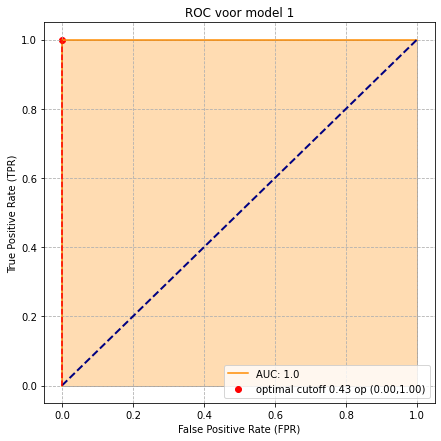

In [18]:
plot_roc(roc1['y_true'],roc1['y_score'], title='ROC voor model 1')

b) Wat is de beste threshold-waarde?

In [19]:
fpr, tpr, thresholds = roc_curve(roc1['y_true'], roc1['y_score'])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4319972097873688

c) Wat is de AUC? Wat betekent dit?

In [20]:
# De Area Under Curve is een maatstaf voor de kwaliteit van de binaire classifier.
# Hoe dichter bij één, hoe beter deze is.

d) Pas de gevonden threshold-toe op de y_score kolom (deze kolom is in feite de uitkomst van de predict_proba-functie van een neuraal netwerk, zie neurale netwerken) om een nieuwe kolom predicted te maken.

e) Herhaal stappen a tot d maar maar op de gegevens uit de simpsons_roc2 dataset. Welke verschillen merk je op?

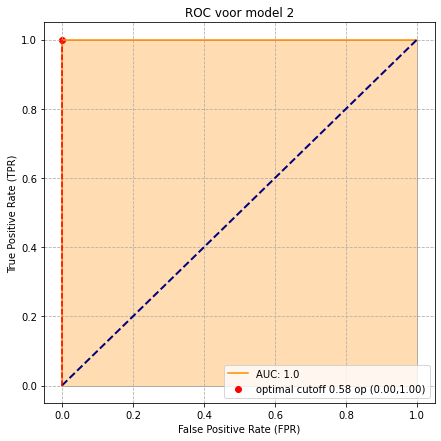

In [21]:
roc2 = pd.read_csv('../datasets/simpsons_roc2.csv')
plot_roc(roc2['y_true'],roc2['y_score'], title='ROC voor model 2')

Vraag 5 - ROC Curves - Infertility
----------------------------------

a) Laad de dataset education_roc1 en education_roc2. Ze bevatten de scores van twee modellen voor de binaire klassificatie.

In [22]:
education_roc1 = pd.read_csv('../datasets/education_roc1.csv')
education_roc2 = pd.read_csv('../datasets/education_roc2.csv')

e) Maak nu twee ROC-modellen voor elk van de voorspellingen m.b.v. de roc-functie.

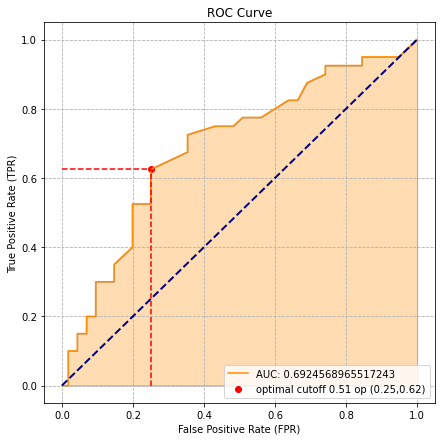

In [23]:
y_true1 = education_roc1['y_true']
y_score1 = education_roc1['6-11yrs']
plot_roc(y_true=y_true1,y_score=y_score1,pos_label='6-11yrs')

f) Plot de ROC-curves met de beste threshold-waarde en hun respectievelijke AUC's. op één en dezelfde grafiek.

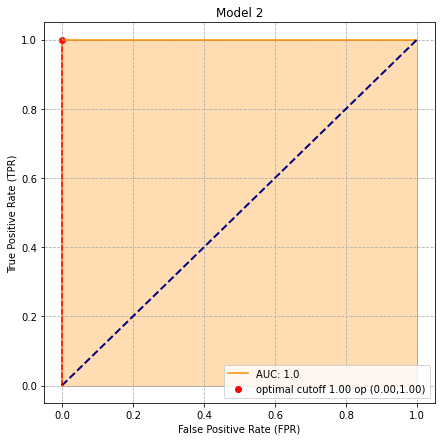

In [24]:
y_true2 = education_roc2['y_true']
y_score2 = education_roc2['6-11yrs']
plot_roc(y_true=y_true2, y_score=y_score2, title='Model 2', pos_label='6-11yrs')

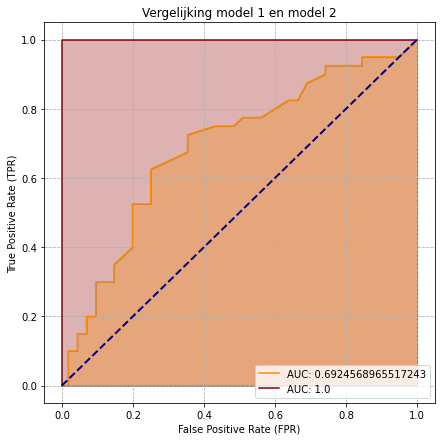

In [27]:
fpr1, tpr1, thresholds1 = roc_curve(y_true=y_true1, y_score=y_score1, pos_label='6-11yrs')
roc_auc1 = roc_auc_score(y_true1, y_score1)
fpr2, tpr2, thresholds2 = roc_curve(y_true=y_true2, y_score=y_score2, pos_label='6-11yrs')
roc_auc2 = roc_auc_score(y_true2, y_score2)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(fpr1, tpr1, color='darkorange', label='AUC: {}'.format(roc_auc1))
ax.plot(fpr2, tpr2, color='darkred', label='AUC: {}'.format(roc_auc2))
ax.set_title('Vergelijking model 1 en model 2')
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.grid(linestyle='--')
ax.fill_between(fpr2,tpr2, alpha=0.3, color='darkred', edgecolor='black')
ax.fill_between(fpr1,tpr1, alpha=0.3, color='darkorange', edgecolor='black')
_ = ax.legend(loc='lower right')

g) Wat concludeer je?

In [26]:
# Het tweede model is veel beter.

Inzichtsvragen
--------------

a) Heeft de initiële klasse-verdeling (bvb. #positieven vs. #niet-positieven bij binaire classifier) in een dataset een invloed op kwaliteit van de classifier? Verklaar dit.

b) Welke evaluatiemetriek(en) kunnen deze invloed detecteren? Welke niet? Waarom?

c) Hoe kun je dit probleem oplossen?

d) Waar ligt de beste threshold-waarde op een ROC-curve? Waarom is dit?